In [137]:
import numpy as np
from scipy.optimize import curve_fit

def tapered_power_law(r_in, z0_in, Psi_in, r_taper_in, Phi_in):
    """
    This function computes the "tapered" power-law function.
    It takes in five parameters.
    
    Args:
        zo_in (float): input scale height [in arcsec].
        r_in (float): input list of the radii[in arcsec] we are observing.
        Psi_in (float): a unitless parameter.
        r_taper_in (float): input "tapered" radius [in arcsec].
        Phi_in (float): another unitless parameter.
        
    Returns:
        This function returns the height[in arcsec].
    """
    height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
    return height_z

In [138]:
import numpy as np

def HD163296_power_law(radius_in, flare_parameter_in, scale_height_in):
    """
    This function computes the radial height of a given gas emission surface or dust scattering surface.
    It takes in three one-dimensional input arrays. Notice that the "flare_parameter_in" and  "scale_height_in"
    parameter must have same size.
    
    Args:
        radius_in (float): input array of the radii[in arcsec] we are observing.
        flare_parameter_in (float): input array of flaring parameter.
        scale_height_in (float): input array of scale height.
        
    Returns:
        This function returns an one-dimensional array of radial heights[in arcsec].
    """
    if len(scale_height_in) == 1:
        radial_height = scale_height_in / 101 * (radius_in / (100 / 101)) ** flare_parameter_in
        return radial_height
    else:
        output1 = (radius_in / (100 / 101)) ** flare_parameter_in.reshape(len(flare_parameter_in),1)
        output1 = output1.reshape(1,len(flare_parameter_in) * len(radius_in))
        radial_height = scale_height_in.reshape(len(scale_height_in),1) / 101 * output1
        radial_height = radial_height.reshape(len(scale_height_in) * len(flare_parameter_in), len(radius_in))
        return radial_height

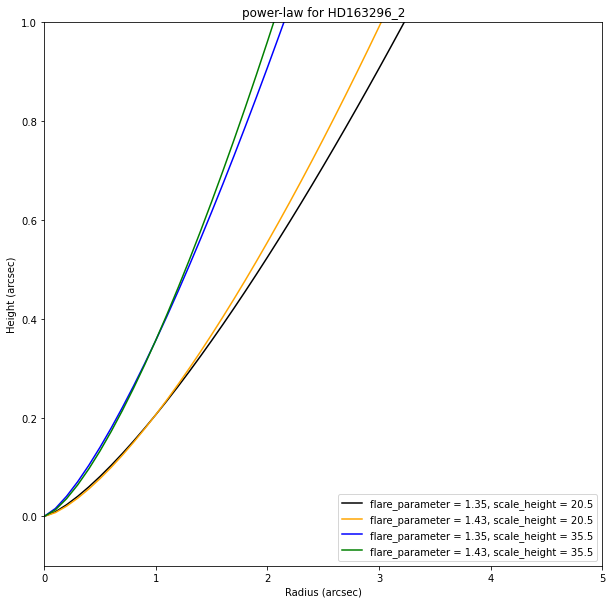

In [139]:
import matplotlib.pyplot as plt

radius_2 = np.arange(0, 5, step=0.1)

HD163296_12CO_flare_parameter2 = np.array([1.35, 1.43])
HD163296_12CO_scale_height2 = np.array([20.5, 35.5])

HD163296_12CO_height_2 = HD163296_power_law(radius_2, HD163296_12CO_flare_parameter2, HD163296_12CO_scale_height2)

plt.figure(figsize=(10, 10))
plt.plot(radius_2, HD163296_12CO_height_2[0], 'r', color='black', label='flare_parameter = 1.35, scale_height = 20.5')
plt.plot(radius_2, HD163296_12CO_height_2[1], 'r', color='orange', label='flare_parameter = 1.43, scale_height = 20.5')
plt.plot(radius_2, HD163296_12CO_height_2[2], 'r', color='blue', label='flare_parameter = 1.35, scale_height = 35.5')
plt.plot(radius_2, HD163296_12CO_height_2[3], 'r', color='green', label='flare_parameter = 1.43, scale_height = 35.5')
plt.legend()
plt.ylim(-0.1, 1)
plt.xlim(0, 5)
plt.xlabel(r'Radius (arcsec)')
plt.ylabel(r'Height (arcsec)')
plt.title(r'power-law for HD163296_2')
plt.show()

In [140]:
import matplotlib.pyplot as plt
from itertools import product

def plotting_function_of_tapered_power_law(z0_in, r_in, Psi_in, r_taper_in, Phi_in, color_array_in):
    """
    This function plots tapered power-law function with one (or many) combination(s) of values.
    It takes in six parameters whose data type can only be float or list.
    
    Args:
        zo_in (float/list): input scale height [in arcsec].
        r_in (float/list): input list of the radii[in arcsec] we are observing.
        Psi_in (float/list): a unitless parameter.
        r_taper_in (float/list): input "tapered" radius [in arcsec].
        Phi_in (float/list): another unitless parameter.
        color_array_in (list): input list of colors.
        
    Returns:
        This function returns nothing.
    """
    fig = plt.figure(figsize=(15, 15))
    if type(z0_in) == int:
        plt.plot(r_in, tapered_power_law(r_in, z0_in, Psi_in, r_taper_in, Phi_in), 'r--', color='red', label='z0 = ' + str(z0_in) + ' , ψ= ' + str(Psi_in) + ' , r_taper = ' + str(r_taper_in) + ' , φ = ' + str(Phi_in))
        plt.legend()
        plt.ylim(-0.1, 30)
        plt.xlim(0, 5)
        plt.xlabel(r'Radius (arcsec)')
        plt.ylabel(r'Height (arcsec)')
        plt.title(r'Tapered Power Law')
    if type(z0_in) == list:
        index = 0
        for count, value in enumerate(list(product(z0_in, Psi_in, r_taper_in, Phi_in))):
            plt.plot(r_in, tapered_power_law(r_in, value[0], value[1], value[2], value[3]), 'r--', color=color_array[index], label='z0 = ' + str(value[0]) + ' , ψ= ' + str(value[1]) + ' , r_taper = ' + str(value[2]) + ' , φ = ' + str(value[3]))
            index = index + 1
        plt.legend()
        plt.ylim(-0.1, 30)
        plt.xlim(0, 5)
        plt.xlabel(r'Radius (arcsec)')
        plt.ylabel(r'Height (arcsec)')
        plt.title(r'Tapered Power Law')

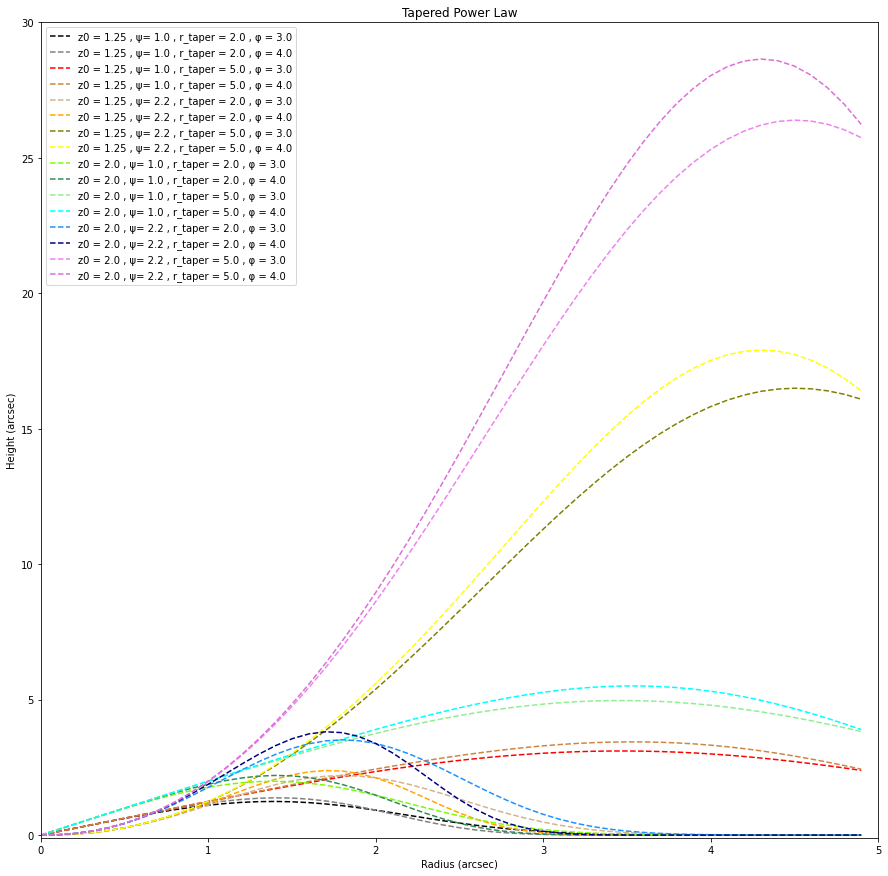

In [141]:
color_array = ['black', 'grey', 'red', 'peru', 'tan', 'orange', 'olive', 'yellow', 'lawngreen', 'seagreen', 'lightgreen', 'cyan', 'dodgerblue', 'navy', 'violet', 'orchid']
r = np.arange(0, 5, step=0.1)
z0 = [1.25, 2.0]
Psi = [1.0, 2.2]
r_taper = [2.0, 5.0]
Phi = [3.0, 4.0]

plotting_function_of_tapered_power_law(z0, r, Psi, r_taper, Phi, color_array)

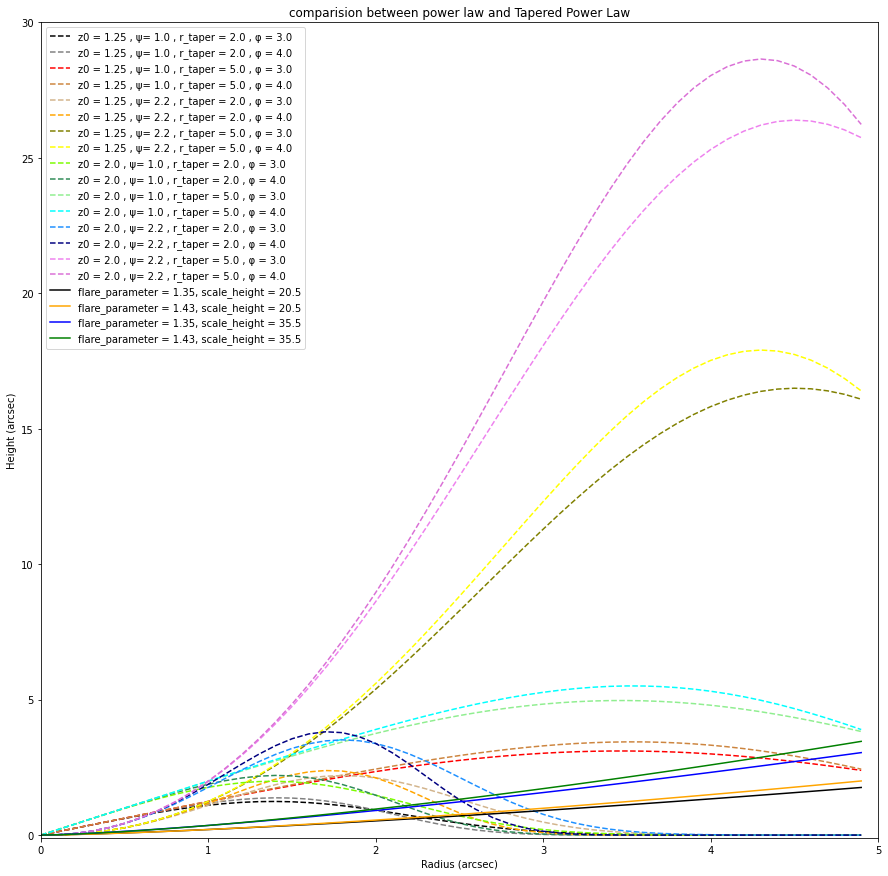

In [143]:
color_array = ['black', 'grey', 'red', 'peru', 'tan', 'orange', 'olive', 'yellow', 'lawngreen', 'seagreen', 'lightgreen', 'cyan', 'dodgerblue', 'navy', 'violet', 'orchid']
r = np.arange(0, 5, step=0.1)
z0 = [1.25, 2.0]
Psi = [1.0, 2.2]
r_taper = [2.0, 5.0]
Phi = [3.0, 4.0]

index = 0
fig = plt.figure(figsize=(15, 15))
for count, value in enumerate(list(product(z0, Psi, r_taper, Phi))):
    plt.plot(r, tapered_power_law(r, value[0], value[1], value[2], value[3]), 'r--', color=color_array[index], label='z0 = ' + str(value[0]) + ' , ψ= ' + str(value[1]) + ' , r_taper = ' + str(value[2]) + ' , φ = ' + str(value[3]))
    index = index + 1
plt.legend()
plt.ylim(-0.1, 30)
plt.xlim(0, 5)
plt.xlabel(r'Radius (arcsec)')
plt.ylabel(r'Height (arcsec)')
plt.title(r'comparision between power law and Tapered Power Law')
plt.plot(radius_2, HD163296_12CO_height_2[0], 'r', color='black', label='flare_parameter = 1.35, scale_height = 20.5')
plt.plot(radius_2, HD163296_12CO_height_2[1], 'r', color='orange', label='flare_parameter = 1.43, scale_height = 20.5')
plt.plot(radius_2, HD163296_12CO_height_2[2], 'r', color='blue', label='flare_parameter = 1.35, scale_height = 35.5')
plt.plot(radius_2, HD163296_12CO_height_2[3], 'r', color='green', label='flare_parameter = 1.43, scale_height = 35.5')
plt.legend()
plt.show()

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from diskprojection import disk_observation

HD163296_HCN = disk_observation('/data/shared/HD163296_MAPS/HD_163296_HCN_260GHz_hf1.robust_0.5.clean.JvMcorr.image.pbcor.fits')
#note that chans does NOT correspond to the channel maps
r, z, Fnu, velocity, x, yf, yn = HD163296_HCN.get_emission_surface_v2(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, min_Fnu=.0025)

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


In [145]:
rvals_tofit = r[np.where(velocity==HD163296_HCN.velax[69])]
zvals_tofit = z[np.where(velocity==HD163296_HCN.velax[69])]

popt, cov = HD163296_HCN.fit_emission_surface(rvals_tofit, zvals_tofit, curve_fit_kwargs = {'p0': np.array([0.2, 1.0, 4.0, 5.0])})
print(popt)

[ 0.07425394  1.99640027  3.74591235 15.97498396]


In [169]:
color_array = ['black', 'grey', 'red', 'peru', 'tan', 'orange', 'olive', 'yellow', 'lawngreen', 'seagreen', 'lightgreen', 'cyan', 'dodgerblue', 'navy', 'violet', 'orchid']
r = np.arange(0, 5, step=0.1)
z0 = [0.05, 1.0]
Psi = [1.5, 2.2]
r_taper = [2.5, 4.0]
Phi = [10.0, 20.0]

for count, value in enumerate(list(product(z0, Psi, r_taper, Phi))):
    popt, cov = HD163296_HCN.fit_emission_surface(rvals_tofit, zvals_tofit, curve_fit_kwargs = {'p0': np.array([value[0], value[1], value[2], value[3]])})
    print('Initial guess: ' + str(np.array([value[0], value[1], value[2], value[3]])), ', result = ' + str(np.array([popt[0], popt[1], popt[2], popt[3]])))

Initial guess: [ 0.05  1.5   2.5  10.  ] , result = [ 7.87610189e-02  1.63812391e+00  2.13144419e-09 -8.84340658e-01]
Initial guess: [ 0.05  1.5   2.5  20.  ] , result = [ 0.07425509  1.9963808   3.74591399 15.9754235 ]
Initial guess: [ 0.05  1.5   4.   10.  ] , result = [ 0.07425909  1.99631369  3.74591961 15.97688657]
Initial guess: [ 0.05  1.5   4.   20.  ] , result = [ 0.07425397  1.99639963  3.74591241 15.9750074 ]
Initial guess: [ 0.05  2.2   2.5  10.  ] , result = [ 0.07425915  1.99631267  3.7459197  15.97690976]
Initial guess: [ 0.05  2.2   2.5  20.  ] , result = [ 0.07425506  1.99638118  3.74591395 15.97541547]
Initial guess: [ 0.05  2.2   4.   10.  ] , result = [ 0.07425857  1.99632228  3.74591889 15.97670241]
Initial guess: [ 0.05  2.2   4.   20.  ] , result = [ 0.07425912  1.99631321  3.74591965 15.9768953 ]
Initial guess: [ 1.   1.5  2.5 10. ] , result = [ 0.07425523  1.9963783   3.7459142  15.97547863]
Initial guess: [ 1.   1.5  2.5 20. ] , result = [ 0.07425418  1.996395

/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)


In [179]:
import numpy as np
import matplotlib.pyplot as plt
from diskprojection import disk_observation

def best_fit_curve_and_datapoints(path_in, r_in, z0_in, Psi_in, r_taper_in, Phi_in, color_array_in):
    """
    This function plots best fit curves over datapoints.
    It takes in seven parameters.
    
    Args:
        path_in (str): name[no units] of directory holding the real ALMA observational images.
        zo_in (float/list): input scale height [in arcsec].
        r_in (float/list): input list of the radii[in arcsec] we are observing.
        Psi_in (float/list): a unitless parameter.
        r_taper_in (float/list): input "tapered" radius [in arcsec].
        Phi_in (float/list): another unitless parameter.
        color_array_in (list): input list of colors.
        
    Returns:
        This function returns nothing.
    """
    HD163296_molecule = disk_observation(path_in)
    r, z, Fnu, velocity, x, yf, yn = HD163296_molecule.get_emission_surface_v2(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, min_Fnu = 0.0025)
    fig = plt.figure(figsize=(100, 130))
    for index, velo in enumerate(np.unique(velocity)):
        if round(velo / 1000., 2) >= 6.26 and round(velo / 1000., 2) <= 7.86:
            rvals_tofit = r[np.where(velocity==velo)]
            zvals_tofit = z[np.where(velocity==velo)]
            i = 0
            ax = plt.subplot(7, 8, index+1)
            ax.scatter(r[np.where(velocity==velo)], z[np.where(velocity==velo)],s=2)
            ax.set_xlabel('r (arcsec)')
            ax.set_ylabel('z (arcsec)')
            ax.set_xlim(left = 0, right=5)
            ax.text(0.75, 0.9, "%.2f km/s" % (velo/1000.), transform=ax.transAxes)
            for count, value in enumerate(list(product(z0_in, Psi_in, r_taper_in, Phi_in))):
                popt, cov = HD163296_HCN.fit_emission_surface(rvals_tofit, zvals_tofit, curve_fit_kwargs = {'p0': np.array([value[0], value[1], value[2], value[3]])})
                ax.plot(r_in, tapered_power_law(r_in, popt[0], popt[1], popt[2], popt[3]), 'r--', color=color_array_in[i], label='z0 = ' + str(popt[0]) + ' , ψ= ' + str(popt[1]) + ' , r_taper = ' + str(popt[2]) + ' , φ = ' + str(popt[3]))
                i = i + 1
                ax.legend()
    plt.show()

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


/data/shared/diskprojection/diskprojection/diskprojection.py:1062: RuntimeWarning: invalid value encountered in sqrt
  copt = np.diag(copt)**0.5
<ipython-input-137-437d04988e8f>:19: RuntimeWarning: divide by zero encountered in power
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
<ipython-input-137-437d04988e8f>:19: RuntimeWarning: invalid value encountered in multiply
  height_z = ((r_in) ** Psi_in) * z0_in * np.exp(np.sign((-(r_in / r_taper_in))) * (np.abs((-(r_in / r_taper_in)))) ** Phi_in)
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: overflow encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: overflow encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: overflow encountered

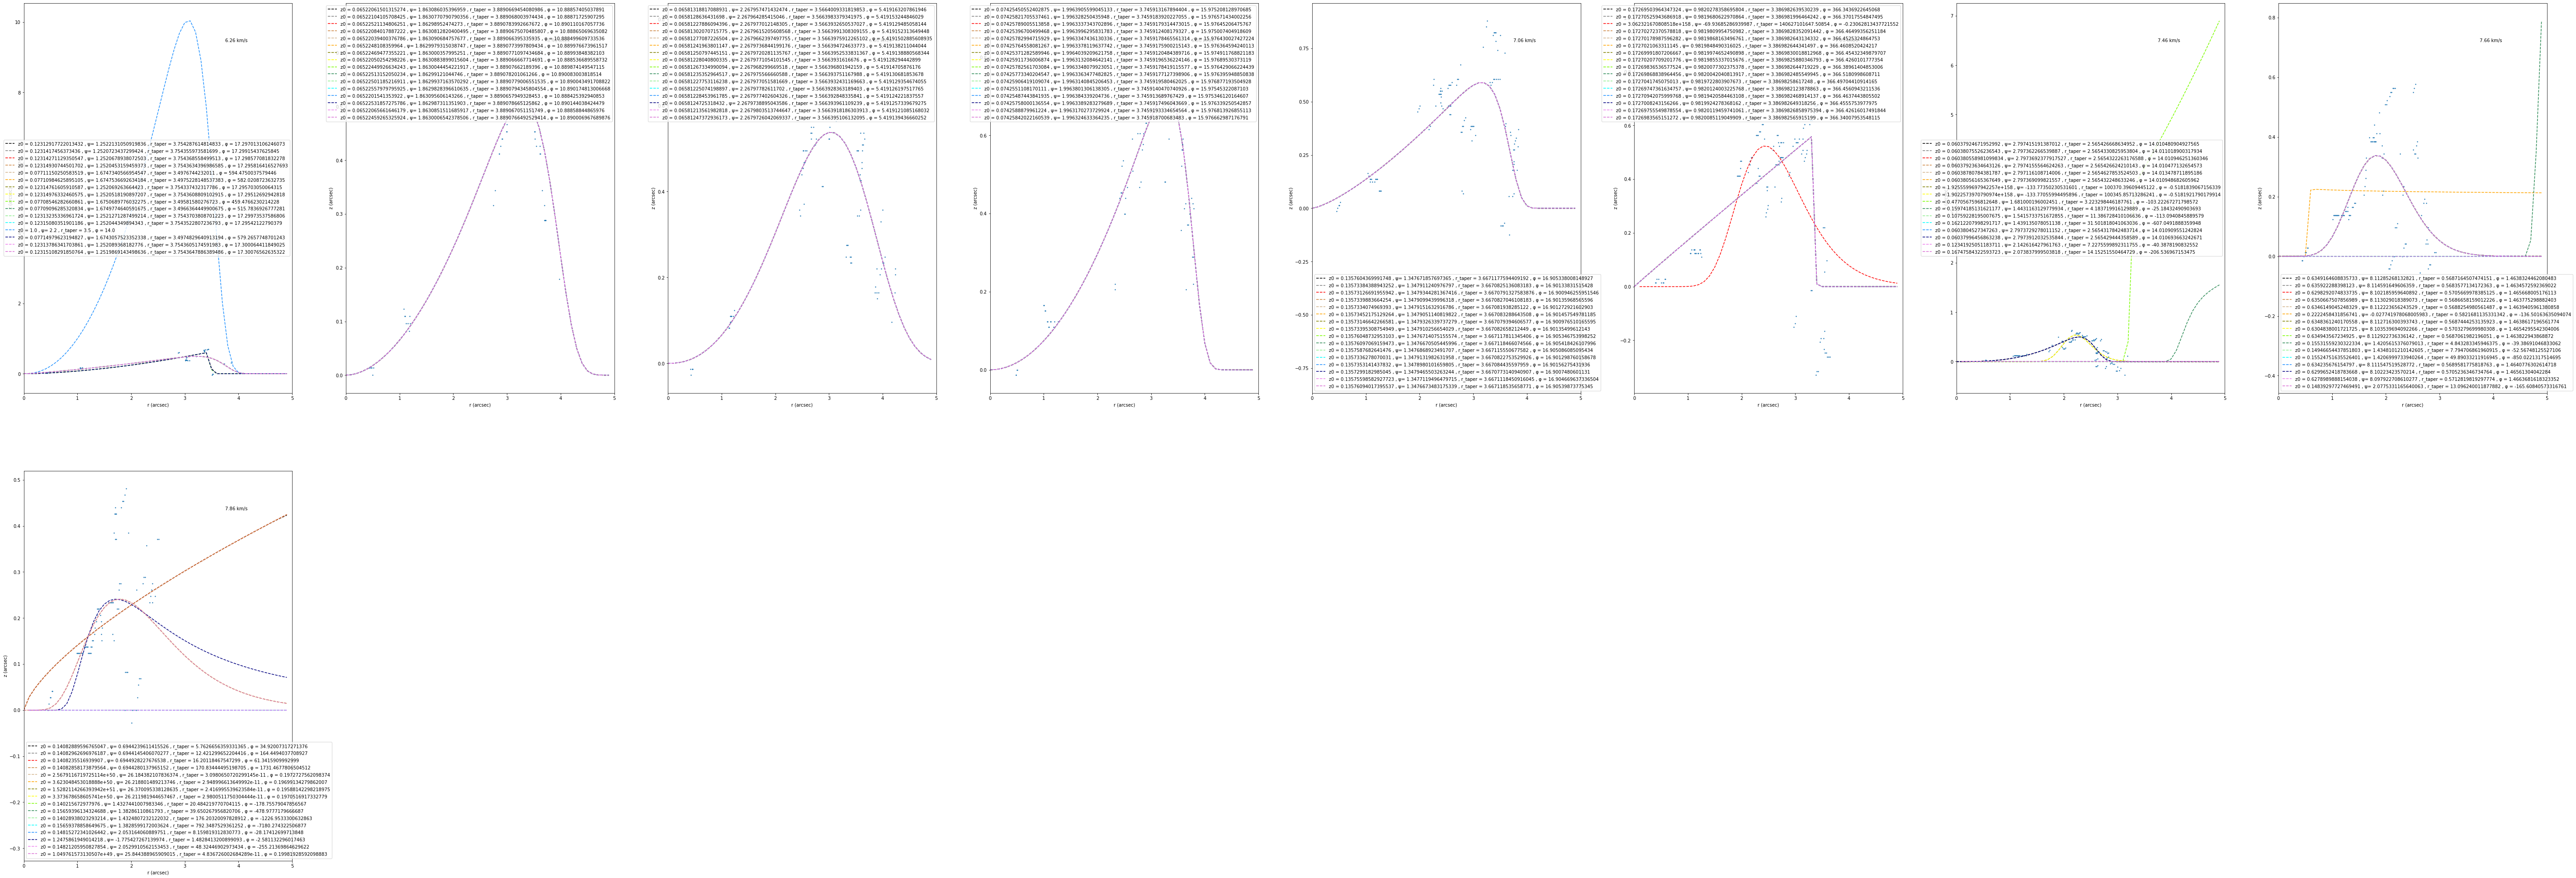

In [180]:
color_array = ['black', 'grey', 'red', 'peru', 'tan', 'orange', 'olive', 'yellow', 'lawngreen', 'seagreen', 'lightgreen', 'cyan', 'dodgerblue', 'navy', 'violet', 'orchid']
r = np.arange(0, 5, step=0.1)
z0 = [0.05, 1.0]
Psi = [1.5, 2.2]
r_taper = [3.5, 4.0]
Phi = [14.0, 20.0]

path = '/data/shared/HD163296_MAPS/HD_163296_HCN_260GHz_hf1.robust_0.5.clean.JvMcorr.image.pbcor.fits'
best_fit_curve_and_datapoints(path, r, z0, Psi, r_taper, Phi, color_array)

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: overflow encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: overflow encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/data/shared/diskprojection/diskprojection/diskprojection.py:1415: RuntimeWarning: invalid value encountered in power
  return f * np.exp(-(rr / r_taper)**q_taper)
/usr/local/anaconda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not 

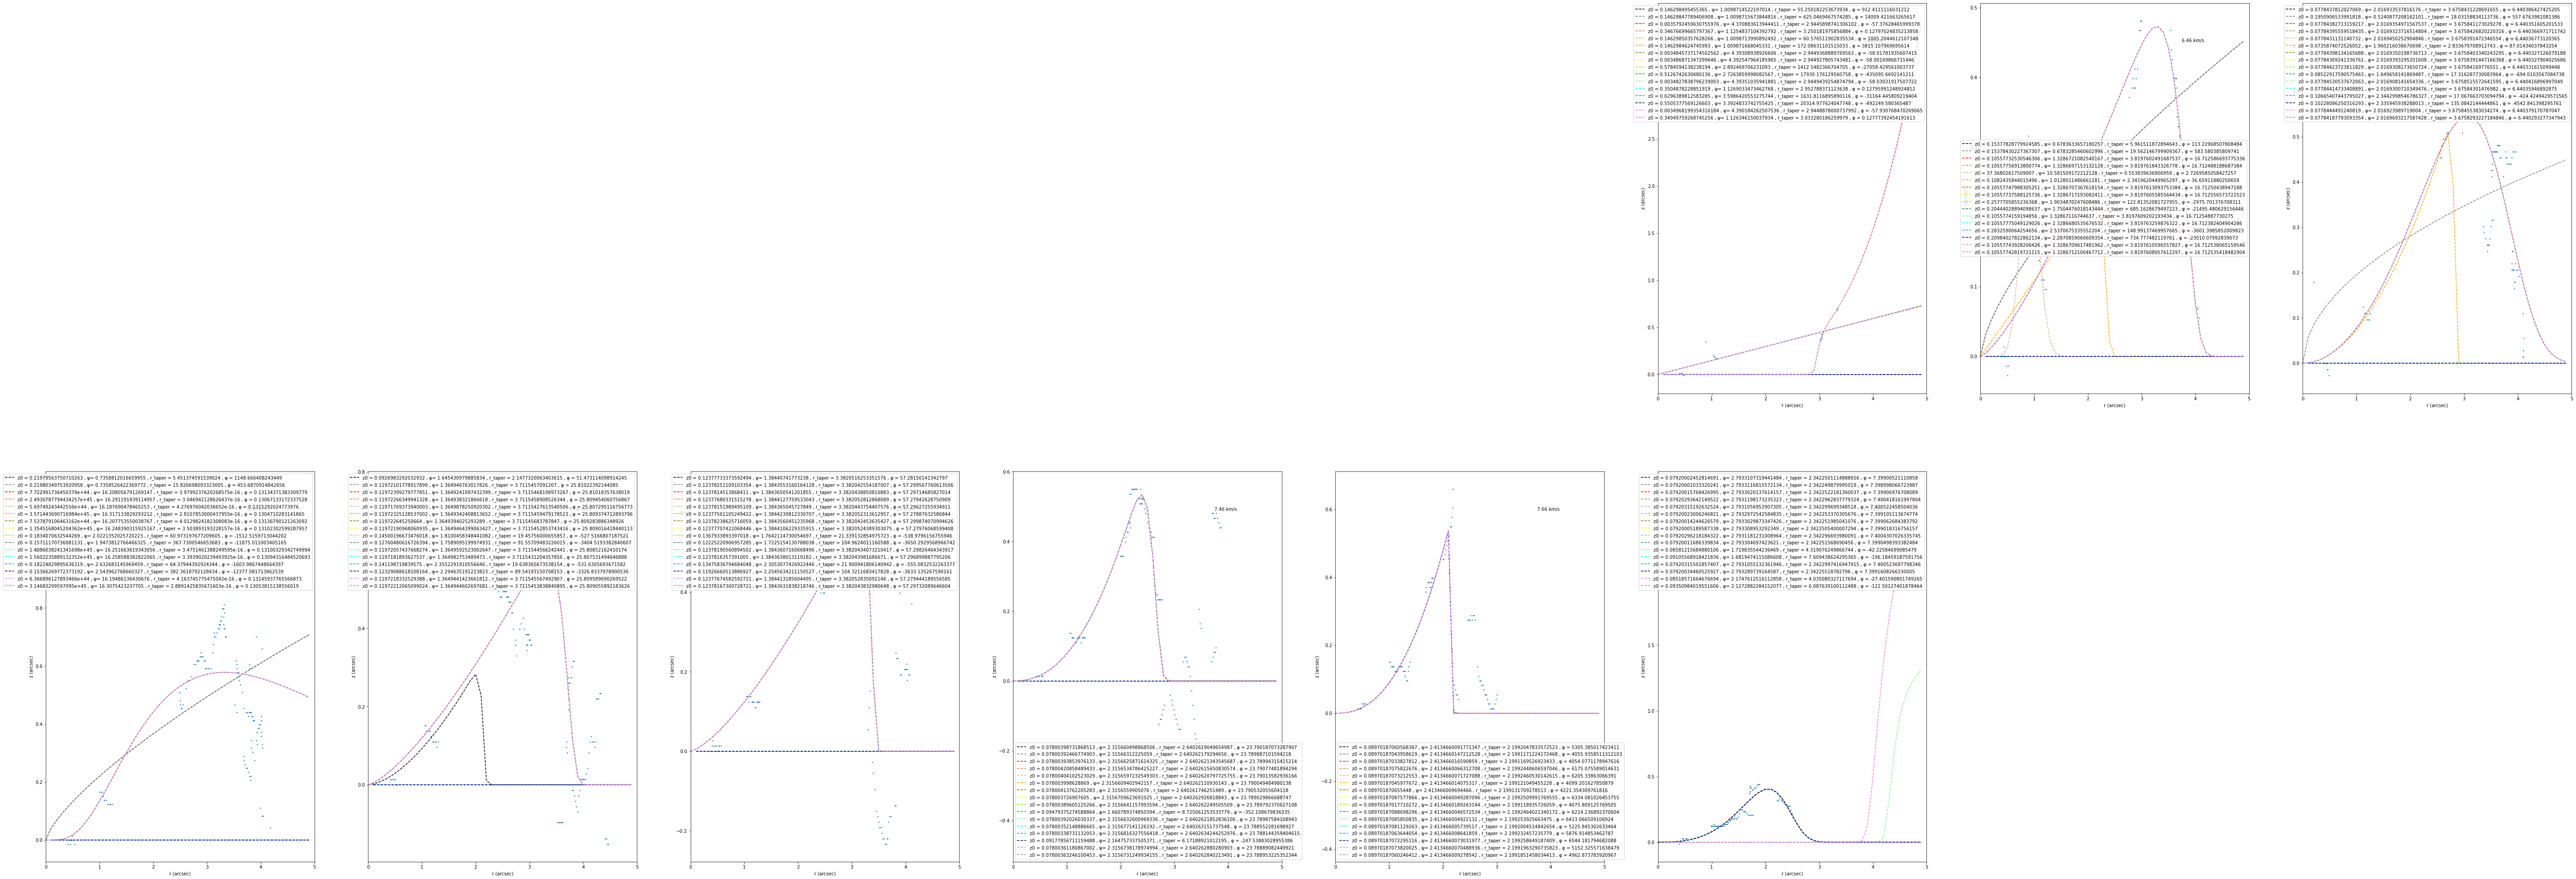

In [181]:
color_array = ['black', 'grey', 'red', 'peru', 'tan', 'orange', 'olive', 'yellow', 'lawngreen', 'seagreen', 'lightgreen', 'cyan', 'dodgerblue', 'navy', 'violet', 'orchid']
r_2 = np.arange(0, 5, step=0.1)
z0_2 = [0.05, 0.5]
Psi_2 = [1.5, 2.1]
r_taper_2 = [1.8, 3.0]
Phi_2 = [15.0, 20.0]

path_2 = '/data/shared/HD163296_MAPS/HD_163296_HCN_260GHz_hf1.0.2arcsec.clean.JvMcorr.image.pbcor.fits'
best_fit_curve_and_datapoints(path_2, r_2, z0_2, Psi_2, r_taper_2, Phi_2, color_array)